In [1]:
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
from vision import WIDTH, TargetDetector, TargetDetectorMobileNet
from board import Board
from motor_controller import Direction, MotorController
from distance_sensor import DistanceSensor
from compass import Compass
from compass_sensor import CompassSensor
import time
from typing import Optional, Tuple
from timer import timer
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def _get_direction(target: int, width: int = WIDTH, side_ratio: float = 0.33) -> Direction:
    if target < side_ratio * width:
        return Direction.LEFT
    elif target > (1 - side_ratio) * width:
        return Direction.RIGHT
    else:
        return Direction.FORWARD

def get_direction(target: int, last_direction: Optional[Direction], width: int = WIDTH, side_ratio: float = 0.25) -> Direction:
    direction = _get_direction(target, width, side_ratio)
    if direction == last_direction and direction in (Direction.LEFT, Direction.RIGHT):
        return Direction.NONE
    return direction

In [4]:
def get_turn_duration(target: int, width: int = WIDTH, side_ratio: float = 0.33, min_duration: float = 0.25, max_duration: float = 0.5) -> float:
    if target < side_ratio * width:
        return (1 - (target / (side_ratio * width))) * (max_duration - min_duration) + min_duration
    elif target > (1 - side_ratio) * width:
        return ((target - (1 - side_ratio) * width) / (side_ratio * width)) * (max_duration - min_duration) + min_duration
    else:
        # forward: 2 * max
        return 2 * max_duration

In [5]:
def plot_distances(distances, fig, ax):
    if not (distances is None) and len(distances.shape) == 2:
        ax.scatter(distances[:, 0], distances[:, 1])
        ax.set_xlim(-50, 50)
        ax.set_ylim(0, 100)
        fig.canvas.draw()

In [10]:
board.stop()

INFO:Timer:Latency: 0.164231 sec
INFO:TargetDetectorMobileNet:Capture thread started
INFO:TargetDetectorMobileNet:Detect thread started
INFO:DistanceSensor:Motor control loop started
INFO:root:Distance controller started


Motor control loop started
Motor controller started


INFO:Timer:Latency: 0.094991 sec
INFO:Driving:Target found: (107, 181) Direction.LEFT, 0.37334280303030304
INFO:Timer:Latency: 0.095359 sec
INFO:Driving:Target found: (114, 177) Direction.NONE, 0.36505681818181823


Direction: Direction.LEFT, duration: 0.37334280303030304ms
Direction: Direction.NONE, duration: 0.36505681818181823ms


INFO:Timer:Latency: 0.094775 sec
INFO:Driving:Target found: (119, 179) Direction.LEFT, 0.35913825757575757
INFO:Timer:Latency: 0.095711 sec
INFO:Driving:Target found: (144, 176) Direction.NONE, 0.3295454545454546


Direction: Direction.LEFT, duration: 0.35913825757575757ms
Direction: Direction.NONE, duration: 0.3295454545454546ms


INFO:Timer:Latency: 0.094764 sec
INFO:Driving:Target found: (152, 183) Direction.LEFT, 0.32007575757575757
INFO:Timer:Latency: 1.303499 sec
INFO:Timer:Latency: 0.095500 sec
INFO:Driving:Target found: (228, 177) Direction.FORWARD, 1.0


Direction: Direction.LEFT, duration: 0.32007575757575757ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.106181 sec
INFO:Timer:Latency: 0.095218 sec
INFO:Driving:Target found: (289, 187) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095251 sec
INFO:Driving:Target found: (329, 185) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095262 sec
INFO:Driving:Target found: (318, 179) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095913 sec
INFO:Driving:Target found: (303, 173) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.837629 sec


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.096027 sec
INFO:Driving:Target found: (301, 174) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.098385 sec
INFO:Driving:Target found: (301, 172) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095701 sec
INFO:Driving:Target found: (302, 167) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095344 sec
INFO:Driving:Target found: (289, 164) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.096253 sec
INFO:Driving:Target found: (261, 159) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.843809 sec
INFO:Timer:Latency: 0.096400 sec
INFO:Driving:Target found: (251, 154) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.098315 sec
INFO:Driving:Target found: (238, 156) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095524 sec
INFO:Driving:Target found: (240, 157) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.096492 sec
INFO:Driving:Target found: (246, 156) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095908 sec
INFO:Driving:Target found: (226, 153) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095564 sec
INFO:Timer:Latency: 0.832399 sec
INFO:Driving:Target found: (206, 159) Direction.FORWARD, 0.25615530303030304
INFO:Timer:Latency: 0.097181 sec
INFO:Driving:Target found: (171, 152) Direction.FORWARD, 0.2975852272727273


Direction: Direction.FORWARD, duration: 0.25615530303030304ms
Direction: Direction.FORWARD, duration: 0.2975852272727273ms


INFO:Timer:Latency: 0.095800 sec
INFO:Driving:Target found: (148, 156) Direction.LEFT, 0.3248106060606061
INFO:Timer:Latency: 0.095662 sec
INFO:Driving:Target found: (114, 157) Direction.NONE, 0.36505681818181823


Direction: Direction.LEFT, duration: 0.3248106060606061ms
Direction: Direction.NONE, duration: 0.36505681818181823ms


INFO:Timer:Latency: 0.095455 sec
INFO:Timer:Latency: 0.095714 sec
INFO:Driving:Target found: (176, 157) Direction.FORWARD, 0.2916666666666667
INFO:Timer:Latency: 0.797947 sec
INFO:Timer:Latency: 0.096239 sec
INFO:Driving:Target found: (186, 153) Direction.FORWARD, 0.27982954545454547


Direction: Direction.FORWARD, duration: 0.2916666666666667ms
Direction: Direction.FORWARD, duration: 0.27982954545454547ms


INFO:Timer:Latency: 0.105823 sec
INFO:Driving:Target found: (198, 154) Direction.FORWARD, 0.265625
INFO:Timer:Latency: 0.095551 sec
INFO:Driving:Target found: (170, 159) Direction.FORWARD, 0.29876893939393945


Direction: Direction.FORWARD, duration: 0.265625ms
Direction: Direction.FORWARD, duration: 0.29876893939393945ms


INFO:Timer:Latency: 0.095501 sec
INFO:Driving:Target found: (187, 153) Direction.FORWARD, 0.27864583333333337
INFO:Timer:Latency: 0.095445 sec
INFO:Timer:Latency: 0.829263 sec


Direction: Direction.FORWARD, duration: 0.27864583333333337ms


INFO:Timer:Latency: 0.096314 sec
INFO:Driving:Target found: (94, 162) Direction.LEFT, 0.3887310606060606
INFO:Timer:Latency: 0.106832 sec


Direction: Direction.LEFT, duration: 0.3887310606060606ms


INFO:Timer:Latency: 0.099484 sec
INFO:Timer:Latency: 0.099416 sec
INFO:Timer:Latency: 0.098834 sec
INFO:Timer:Latency: 0.820095 sec
INFO:Timer:Latency: 0.099341 sec
INFO:Driving:Target found: (509, 168) Direction.RIGHT, 0.34493371212121215
INFO:Timer:Latency: 0.096361 sec
INFO:Driving:Target found: (515, 152) Direction.NONE, 0.35203598484848486


Direction: Direction.RIGHT, duration: 0.34493371212121215ms
Direction: Direction.NONE, duration: 0.35203598484848486ms


INFO:Timer:Latency: 0.095907 sec
INFO:Driving:Target found: (473, 156) Direction.FORWARD, 0.3023200757575758
INFO:Timer:Latency: 0.095421 sec
INFO:Driving:Target found: (401, 163) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 0.3023200757575758ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095346 sec
INFO:Driving:Target found: (394, 171) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095366 sec
INFO:Driving:Target found: (374, 164) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.954183 sec
INFO:Timer:Latency: 0.096851 sec
INFO:Driving:Target found: (357, 163) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.097568 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (359, 167) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095569 sec
INFO:Driving:Target found: (371, 164) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095081 sec
INFO:Driving:Target found: (375, 164) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095652 sec
INFO:Driving:Target found: (371, 170) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.956537 sec
INFO:Timer:Latency: 0.095617 sec
INFO:Driving:Target found: (373, 170) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.103898 sec
INFO:Driving:Target found: (389, 180) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.096811 sec
INFO:Driving:Target found: (349, 193) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095540 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.930714 sec
INFO:Timer:Latency: 0.095375 sec
INFO:Timer:Latency: 0.095726 sec
INFO:Timer:Latency: 0.095381 sec
INFO:Timer:Latency: 0.095772 sec
INFO:Timer:Latency: 0.095613 sec
INFO:Timer:Latency: 1.194044 sec
INFO:Timer:Latency: 0.097995 sec
INFO:Timer:Latency: 0.095295 sec
Exception in thread Thread-21 (_capture):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/home/pi/Documents/PythonEnv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/usr/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pi/Documents/RobotCar/vision.py", line 61, in _capture
    has_image, image = self.camera.retrieve()
                       ^^^^^^^^^^^
AttributeError: 'TargetDetectorMobileNet' object has no attribute 'camera'


Motor control loop stopped
Motor controller stopped


INFO:Timer:Latency: 0.788369 sec
INFO:DistanceSensor:Motor control loop stopped
INFO:root:Distance controller stopped


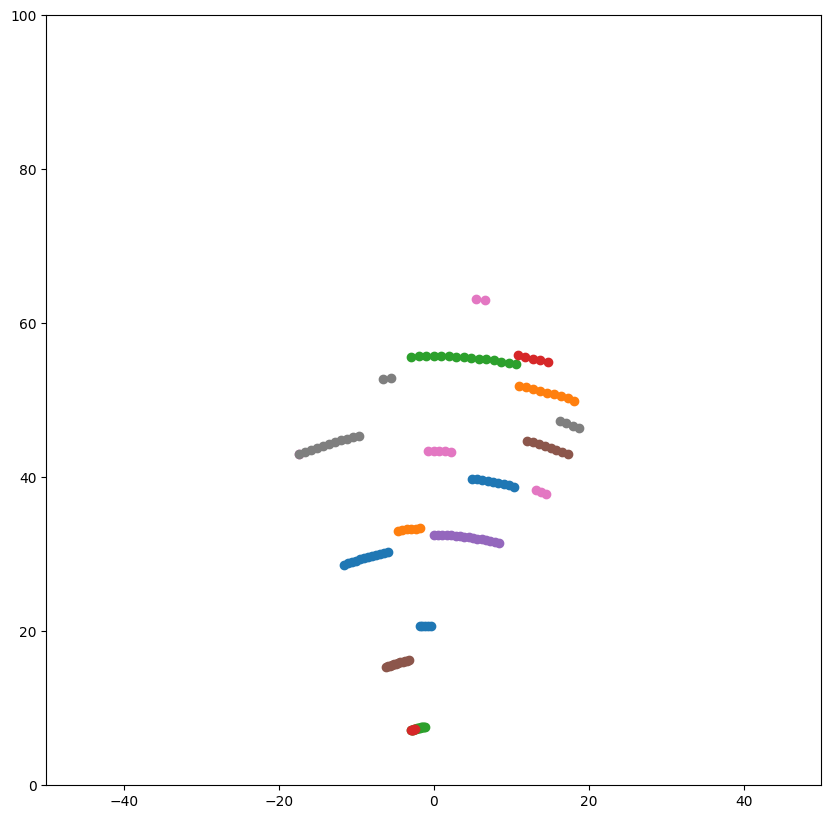

Exception: Emergency stop

In [11]:
target_detector = TargetDetectorMobileNet(confidence=0.5)
board = Board()
motor_controller = MotorController(board)

is_stop = False

def emergency_stop():
    global is_stop
    is_stop = True

distance_sensor = DistanceSensor(board, 10, emergency_stop)
compass = Compass()
compass_sensor = CompassSensor(compass)

logger = logging.getLogger('Driving')

fig, ax = plt.subplots(figsize=(10, 10))

try:
    target_detector.start()
    motor_controller.start()
    distance_sensor.start()
    compass_sensor.start()

    direction = None
    for i in range(500):
        if is_stop:
            board.stop()
            raise Exception('Emergency stop')
        target = target_detector.get_target()
        if target:
            x, _ = target
            direction = get_direction(x, direction, WIDTH)
            duration = get_turn_duration(x, WIDTH)
            logger.info('Target found: %s %s, %s', target, direction, duration)
            motor_controller.send_direction(direction, duration)
            plot_distances(distance_sensor.get_distances(), fig, ax)
        time.sleep(0.05)

finally:
    board.stop()
    motor_controller.stop()
    target_detector.stop()
    distance_sensor.stop()
    compass_sensor.start()
    plt.show()